<a href="https://colab.research.google.com/github/DoctorVinay8097/DV-lab/blob/main/DV_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LeNET-5**

* LeNet-5 is a classic **Convolutional Neural Network** architecture developed by **Yann LeCun** in 1998.
* It was designed for **Handwritten digit recognition** and is considered one of the pioneering CNNs.

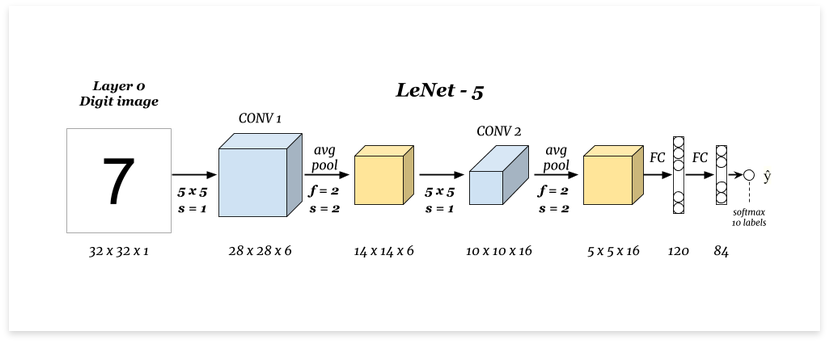

## **Input Layer**

**Input Size:** 32x32 (for MNIST, the original LeNet-5 used 32x32, but MNIST images are 28x28, so you may need to pad them)
The input layer accepts **grayscale images**.

## **Layer-1**

**Convolutional Layer 1:**

Number of Filters: 6

Filter Size: 5x5

Stride: 1

Activation Function: Tanh

Output Size: 28x28x6

The first convolutional layer **extracts basic features** from the input images.

**Max Pooling Layer 1:**

Pooling Size: 2x2

Stride: 2

Output Size: 14x14x6

Max pooling reduces the spatial dimensions and retains the most important information.

## **Layer-2**
**Convolutional Layer 2**:

Number of Filters: 16

Filter Size: 5x5

Stride: 1

Activation Function: Tanh

Output Size: 10x10x16

This layer captures more **complex features**.

**Max Pooling Layer 2:**

Pooling Size: 2x2

Stride: 2

Output Size: 5x5x16

Another pooling layer reduces dimensions.

## **Flatten Layer**

Output Size: 400

This layer flattens the **3D volume into a 1D vector** for fully connected layers.

## **Fully Connected Layer 1**

Number of Neurons: 120

Activation Function: Tanh

This fully connected layer connects to the flattened layer.

## **Fully Connected Layer 2**

Number of Neurons: 84

Activation Function: Tanh

This layer further processes the features.

## **Output Layer**

Number of Neurons: 10 (for 10 classes in MNIST)

Activation Function: Softmax

Output Size: 10

The output layer produces class probabilities.

### Implementing LeNET-5 for MNIST data set

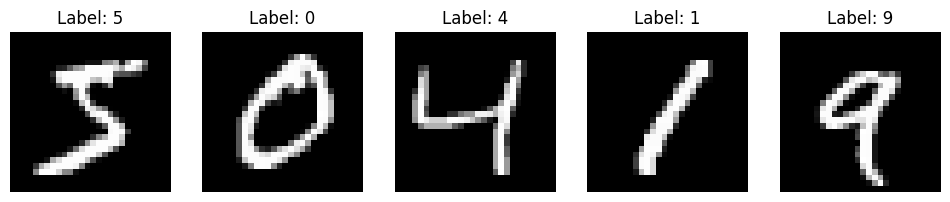

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()

# Define the number of sample images to display
num_samples = 5

# Display sample images
plt.figure(figsize=(12, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1734 - accuracy: 0.9489 - val_loss: 0.0803 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0555 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0433 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0473 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0385 -

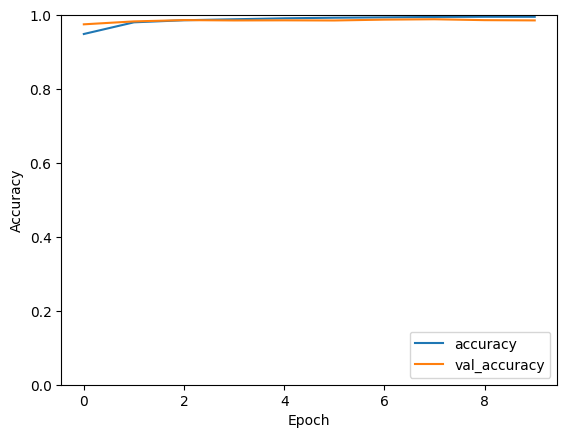

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create the LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 118ms/step


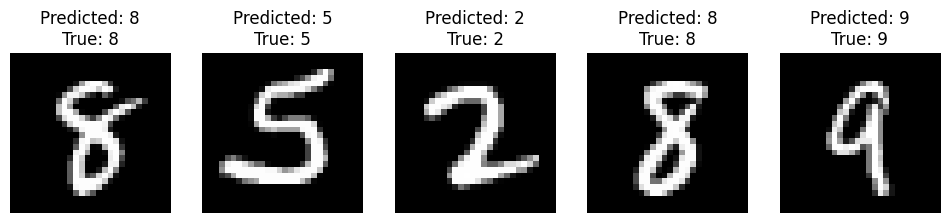

In [7]:
# Select a few sample test images
num_samples = 5
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# Make predictions for the sample images
predictions = model.predict(sample_images)

# Display the sample images along with their predicted outputs
plt.figure(figsize=(12, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {sample_labels[i]}")
    plt.axis('off')

plt.show()